In [159]:
#Bibliotecas

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [161]:
#Funcoes

In [162]:
def plotar_histograma(dados):
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    plt.title(f'Histograma({dados.name})')
    sns.histplot(data = dados, kde = True , bins=10)

In [163]:
def plotar_boxplot(dados):
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 2)
    sns.boxplot(data = dados , orient="v")
    plt.title(f'Boxplot({dados.name})')
    plt.tight_layout(pad=3.0)

In [164]:
def plotar_grafico_setores_registros(proporcao_completos, proporcao_incompletos, proporcao_inconsistentes):
    plt.figure(figsize=(36, 30))
    plt.subplot(4, 1, 2)
    labels = ['Completos', 'Incompletos', 'Inconsistentes']
    sizes = [proporcao_completos, proporcao_incompletos, proporcao_inconsistentes]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Gráfico de Setores: Registros')

In [165]:
def plotar_grafico_setores_outliers(proporcao_outliers_temperature, proporcao_outliers_humidity, proporcao_outliers_light, proporcao_outliers_voltage):
    plt.figure(figsize=(36, 30))
    plt.subplot(4, 1, 2)
    labels = ['temperature','humidity','light','voltage']
    sizes = [proporcao_outliers_temperature, proporcao_outliers_humidity, proporcao_outliers_light, proporcao_outliers_voltage]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Gráfico de Setores: Outliers')

In [166]:
#Dataset completo (todos os registros)

In [167]:
dataset = pd.read_csv(r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\data_with_labels.txt', sep=' ')
dataset

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
2313677,2004-04-02,01:14:54.164318,61274,NaN,NaN,NaN,NaN,NaN
2313678,2004-04-02,01:17:53.670524,61275,NaN,NaN,NaN,NaN,NaN
2313679,2004-04-02,01:20:52.807972,61276,NaN,NaN,NaN,NaN,NaN
2313680,2004-04-02,01:26:53.950342,61278,NaN,NaN,NaN,NaN,NaN


In [168]:
qtd_registros_duplicados = dataset.duplicated().sum()
qtd_registros_duplicados

0

In [169]:
#Dataset correto (apenas registros contendo valores para as oito variaveis e com moteid menor ou igual a 54)

In [170]:
right_dataset = pd.read_csv(r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\right_data_with_labels.txt', sep=' ')
right_dataset

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
2210079,2004-03-21,18:53:27.558979,65510,54,21.4780,47.63610,0.46,2.35683
2210080,2004-03-21,18:54:43.117051,65512,54,21.4780,47.63610,0.46,2.34751
2210081,2004-03-21,18:57:30.336879,65518,54,21.4192,47.66870,0.46,2.34751
2210082,2004-03-21,18:59:36.673512,65522,54,21.3996,47.70130,0.46,2.34751


In [171]:
#Dataset incompleto (apenas registros que nao contem valores para todas as oito variaveis)

In [172]:
incomplete_dataset = pd.read_csv(r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\incomplete_data_with_labels.txt', sep=' ')
incomplete_dataset

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-30,08:11:56.681052,53671,3.0,NaN,NaN,NaN,2.19970
1,2004-02-28,02:21:16.59372,167,5.0,NaN,NaN,NaN,2.69964
2,2004-02-28,03:42:46.678899,330,5.0,NaN,NaN,NaN,2.67532
3,2004-02-28,05:20:16.549645,525,5.0,NaN,NaN,NaN,2.65143
4,2004-02-28,09:32:47.471012,1030,5.0,NaN,NaN,NaN,2.65143
...,...,...,...,...,...,...,...,...
93874,2004-04-02,01:14:54.164318,61274,NaN,NaN,NaN,NaN,NaN
93875,2004-04-02,01:17:53.670524,61275,NaN,NaN,NaN,NaN,NaN
93876,2004-04-02,01:20:52.807972,61276,NaN,NaN,NaN,NaN,NaN
93877,2004-04-02,01:26:53.950342,61278,NaN,NaN,NaN,NaN,NaN


In [173]:
#Dataset inconsistente (apenas registros que contem moteid maior que 54)

In [174]:
inconsistent_dataset = pd.read_csv(r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\inconsistent_data_with_labels.txt', sep=' ')
inconsistent_dataset

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-11,16:52:19.794238,2,55,26.2114,43.4524,97.52,3.04574
1,2004-03-12,09:15:21.526642,2,55,22.0170,41.7805,279.68,3.04574
2,2004-03-11,17:19:23.925033,2,55,25.4274,33.3507,93.84,3.03020
3,2004-03-11,17:15:52.136107,2,55,25.0158,33.9790,97.52,3.03020
4,2004-03-11,16:53:15.807424,4,55,26.2800,35.2995,217.12,3.03020
...,...,...,...,...,...,...,...,...
9714,2004-04-02,09:06:21.488182,62421,58,24.1730,21.6575,1729.60,2.78836
9715,2004-04-02,09:07:22.173243,62423,58,24.1436,21.7310,1729.60,2.78836
9716,2004-04-02,09:07:52.31387,62424,58,24.1436,21.6575,1670.72,2.78836
9717,2004-04-02,09:08:52.189274,62426,58,24.1240,21.5839,1670.72,2.78836


In [175]:
#Estatisticas gerais

In [176]:
right_dataset.drop(columns=['epoch','moteid']).describe()

,temperature,humidity,light,voltage
count,2.210084e+06,2.210084e+06,2.210084e+06,2.210084e+06
mean,3.931401e+01,3.370669e+01,4.076119e+02,2.488983e+00
std,3.748325e+01,1.726761e+01,5.401490e+02,1.769051e-01
min,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,2.046860e+01,3.180720e+01,3.956000e+01,2.385220e+00
50%,2.247760e+01,3.921230e+01,1.582400e+02,2.527320e+00
75%,2.702480e+01,4.348570e+01,5.667200e+02,2.627960e+00
max,3.855680e+02,1.375120e+02,1.847360e+03,3.159150e+00


In [177]:
#Medidas de distribuicao (obliquidade e curtose)

In [178]:
print(skew(right_dataset.temperature))

1.7058121095822867


In [179]:
print(kurtosis(right_dataset.temperature))

1.0078785610312275


In [180]:
print(skew(right_dataset.humidity))

-66.17908188115858


In [181]:
print(kurtosis(right_dataset.humidity))

33707.27269136187


In [182]:
print(skew(right_dataset.light))

1.5893754236331306


In [183]:
print(kurtosis(right_dataset.light))

1.375962317513113


In [184]:
print(skew(right_dataset.voltage))

-0.7254117836269773


In [185]:
print(kurtosis(right_dataset.voltage))

-0.31971581188187725


In [186]:
#Histogramas

c:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


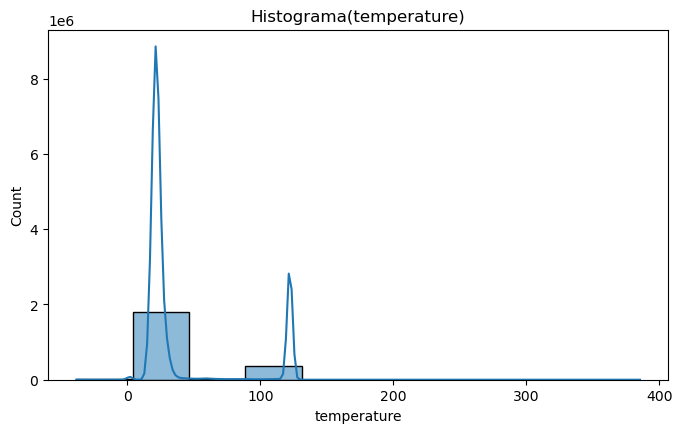

In [187]:
plotar_histograma(right_dataset.temperature)

c:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


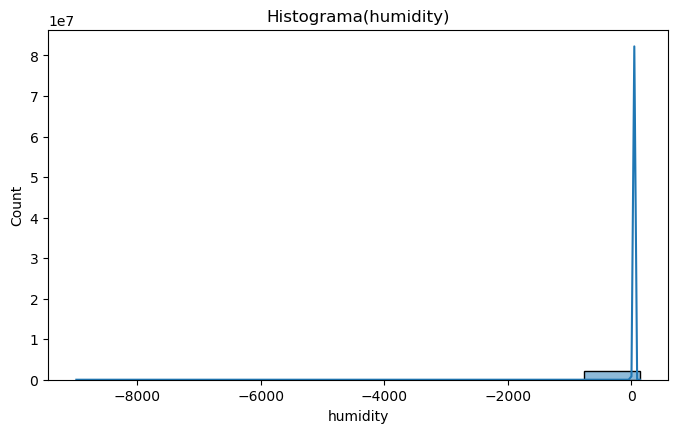

In [188]:
plotar_histograma(right_dataset.humidity)

c:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


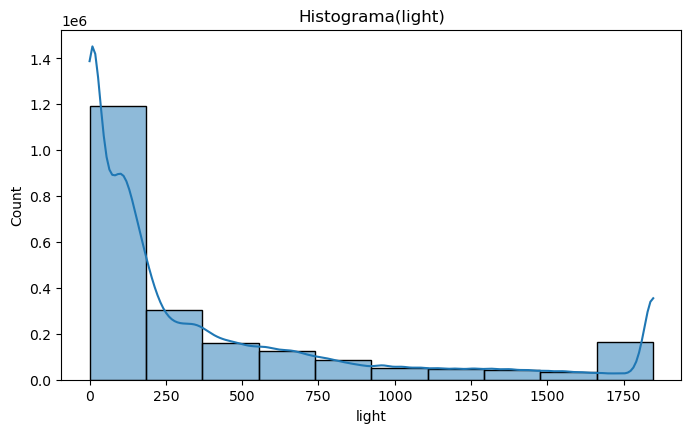

In [189]:
plotar_histograma(right_dataset.light)

c:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


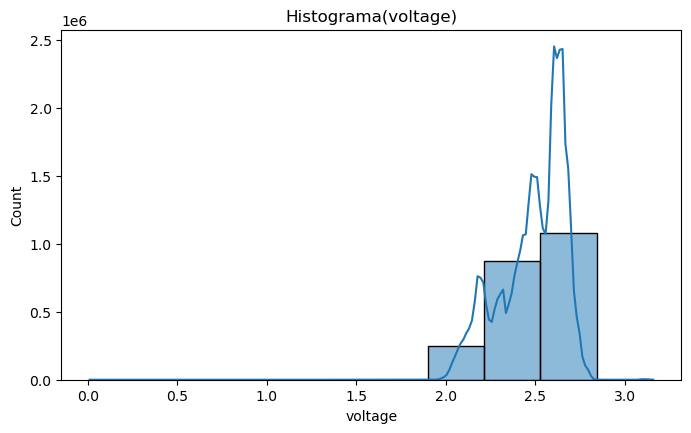

In [190]:
plotar_histograma(right_dataset.voltage)

In [191]:
#Valores de correlação entre variaveis

In [192]:
right_dataset.temperature.corr(right_dataset.humidity)

-0.7283744402871417

In [193]:
right_dataset.temperature.corr(right_dataset.light)

0.02141893230002063

In [194]:
right_dataset.temperature.corr(right_dataset.voltage)

-0.766690703716798

In [195]:
right_dataset.humidity.corr(right_dataset.light)

-0.09139743544361283

In [196]:
right_dataset.humidity.corr(right_dataset.voltage)

0.5364481625083846

In [197]:
right_dataset.light.corr(right_dataset.voltage)

0.0670157872402278

In [198]:
#Boxplots

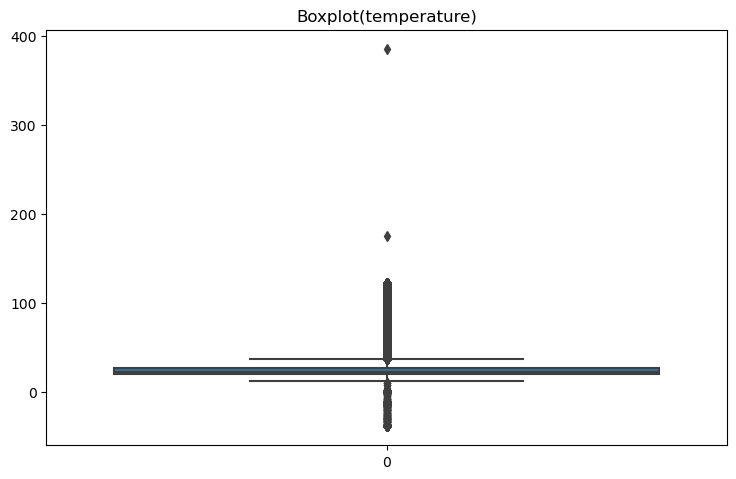

In [199]:
plotar_boxplot(right_dataset.temperature)

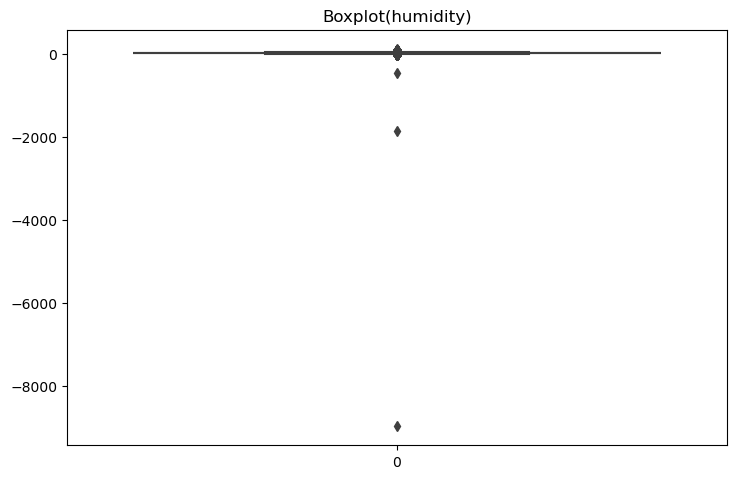

In [200]:
plotar_boxplot(right_dataset.humidity)

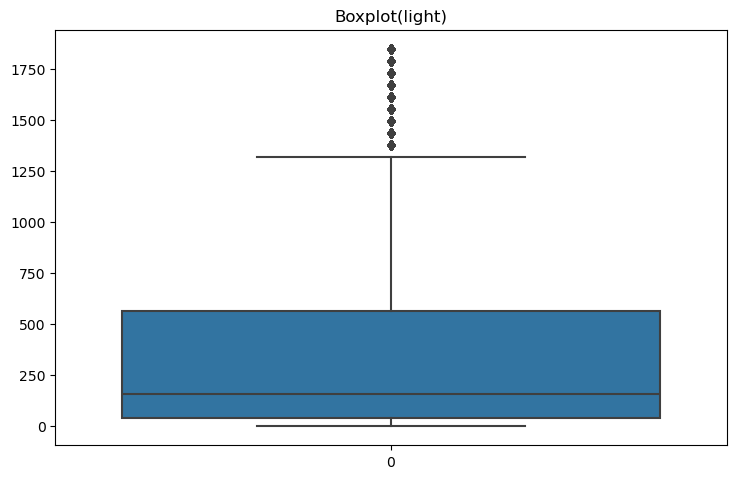

In [201]:
plotar_boxplot(right_dataset.light)

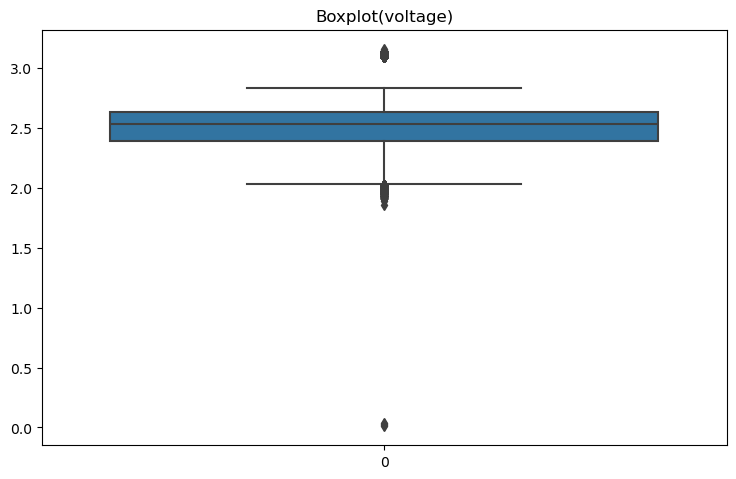

In [202]:
plotar_boxplot(right_dataset.voltage)

In [203]:
#Grafico de setores registros completos x registros incompletos x registros inconsistentes

In [204]:
#numero de registros total
len(dataset.index)

2313682

In [205]:
#numero de registros completos
len(right_dataset.index)

2210084

In [206]:
#numero de registros incompletos
len(incomplete_dataset.index)

93879

In [207]:
#numero de registros inconsistentes
len(inconsistent_dataset.index)

9719

In [208]:
proporcao_completos = len(right_dataset.index)/len(dataset.index)
proporcao_completos

0.9552237515786526

In [209]:
proporcao_incompletos = len(incomplete_dataset.index)/len(dataset.index)
proporcao_incompletos

0.04057558471734664

In [210]:
proporcao_inconsistentes = len(inconsistent_dataset.index)/len(dataset.index)
proporcao_inconsistentes

0.004200663704000809

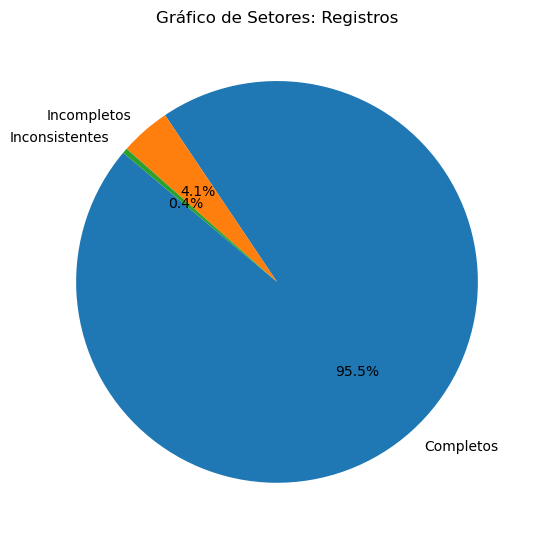

In [211]:
plotar_grafico_setores_registros(proporcao_completos, proporcao_incompletos, proporcao_inconsistentes)

In [212]:
#Grafico de setores outliers_temperature x outliers_humidity x outliers_light x outliers_voltage

In [213]:
physical_variables_right_dataset = right_dataset.drop(columns=['date','time','epoch','moteid'])
physical_variables_right_dataset

,temperature,humidity,light,voltage
0,122.1530,-3.91901,11.04,2.03397
1,19.9884,37.09330,45.08,2.69964
2,19.3024,38.46290,45.08,2.68742
3,19.1652,38.80390,45.08,2.68742
4,19.1750,38.83790,45.08,2.69964
...,...,...,...,...
2210079,21.4780,47.63610,0.46,2.35683
2210080,21.4780,47.63610,0.46,2.34751
2210081,21.4192,47.66870,0.46,2.34751
2210082,21.3996,47.70130,0.46,2.34751


In [214]:
Q1 = physical_variables_right_dataset.quantile(0.25)
Q3 = physical_variables_right_dataset.quantile(0.75)
IQR = Q3 - Q1

In [215]:
((physical_variables_right_dataset < (Q1 - 1.5*IQR)) | (physical_variables_right_dataset > (Q3 + 1.5*IQR))).sum()

temperature    412200
humidity       302902
light          226887
voltage          5983
dtype: int64

In [216]:
qtd_outliers_temperature = ((physical_variables_right_dataset < (Q1 - 1.5*IQR)) | (physical_variables_right_dataset > (Q3 + 1.5*IQR))).temperature.sum()

In [217]:
qtd_outliers_humidity = ((physical_variables_right_dataset < (Q1 - 1.5*IQR)) | (physical_variables_right_dataset > (Q3 + 1.5*IQR))).humidity.sum()

In [218]:
qtd_outliers_light = ((physical_variables_right_dataset < (Q1 - 1.5*IQR)) | (physical_variables_right_dataset > (Q3 + 1.5*IQR))).light.sum()

In [219]:
qtd_outliers_voltage = ((physical_variables_right_dataset < (Q1 - 1.5*IQR)) | (physical_variables_right_dataset > (Q3 + 1.5*IQR))).voltage.sum()

In [220]:
qtd_registros = len(right_dataset.index)

In [221]:
proporcao_outliers_temperature = qtd_outliers_temperature/qtd_registros
proporcao_outliers_temperature

0.18650874808378323

In [222]:
proporcao_outliers_humidity = qtd_outliers_humidity/qtd_registros
proporcao_outliers_humidity

0.13705451919474554

In [223]:
proporcao_outliers_light = qtd_outliers_light/qtd_registros
proporcao_outliers_light

0.10265989889977033

In [224]:
proporcao_outliers_voltage = qtd_outliers_voltage/qtd_registros
proporcao_outliers_voltage

0.002707136923302463

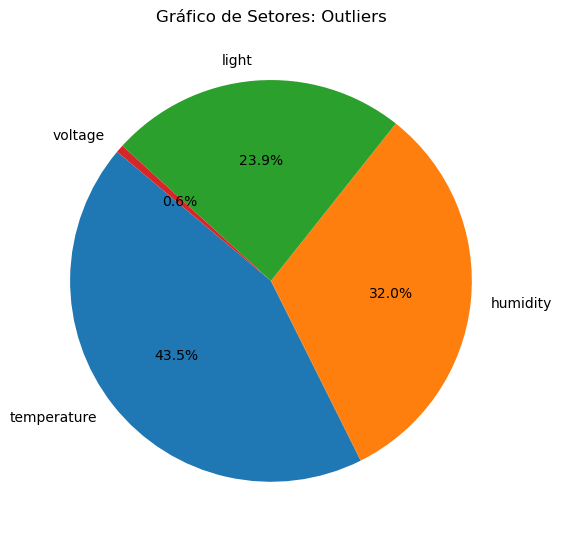

In [225]:
plotar_grafico_setores_outliers(proporcao_outliers_temperature, proporcao_outliers_humidity, proporcao_outliers_light, proporcao_outliers_voltage)

In [226]:
#Numero de outliers por dispositivo

#obs1: data_device_moteid_5 sem registros
#obs2: data_device_moteid_28 sem registros 

In [247]:
for i in range(1,55):
    try:
        file_path = r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\data_device_moteid_' + str(i) + '.txt'
        dataset_device_moteid = pd.read_csv(file_path, sep=' ')
        dataset_device_moteid.columns = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']
        physical_variables_dataset_device_moteid = dataset_device_moteid.drop(columns=['date','time','epoch','moteid'])
        print('Quantidades de outliers do dispositivo com moteid ' + str(i) + ':')
        print(((physical_variables_dataset_device_moteid < (Q1 - 1.5*IQR)) | (physical_variables_dataset_device_moteid > (Q3 + 1.5*IQR))).sum())
        print()
    except:
        print("An exception occurred")
        print()

Quantidades de outliers do dispositivo com moteid 1:
temperature    6682
humidity       4431
light             0
voltage           6
dtype: int64

Quantidades de outliers do dispositivo com moteid 2:
temperature    9127
humidity       6447
light             0
voltage          91
dtype: int64

Quantidades de outliers do dispositivo com moteid 3:
temperature    5813
humidity       4743
light             0
voltage           1
dtype: int64

Quantidades de outliers do dispositivo com moteid 4:
temperature    10650
humidity        9252
light              0
voltage            0
dtype: int64

An exception occurred

Quantidades de outliers do dispositivo com moteid 6:
temperature    10130
humidity        8789
light           2622
voltage         1252
dtype: int64

Quantidades de outliers do dispositivo com moteid 7:
temperature    11820
humidity        9234
light              0
voltage            0
dtype: int64

Quantidades de outliers do dispositivo com moteid 8:
temperature      17
humidity  

In [229]:
#Grafico de barras quantidade de outliers {variavel} x dispositivo

In [253]:
mote_ids = []

#preencher mote_ids exceto com '5' e '28'
for i in range (1,5):
    mote_ids.append(str(i))
for i in range (6,28):
    mote_ids.append(str(i))
for i in range(29,55):
    mote_ids.append(str(i))

qtd_outliers_temperature= []
qtd_outliers_humidity = []
qtd_outliers_light = []
qtd_outliers_voltage = []

for i in range(1,55):
    try:
        file_path = r'C:\Users\Eduardo\Documents\UFBA\PIBIC\Projeto\Datasets\intel_lab_dataset\data_device_moteid_' + str(i) + '.txt'
        dataset_device_moteid = pd.read_csv(file_path, sep=' ')
        dataset_device_moteid.columns = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']
        physical_variables_dataset_device_moteid = dataset_device_moteid.drop(columns=['date','time','epoch','moteid'])
        qtd_outliers_temperature.append(((physical_variables_dataset_device_moteid < (Q1 - 1.5*IQR)) | (physical_variables_dataset_device_moteid > (Q3 + 1.5*IQR))).temperature.sum())
        qtd_outliers_humidity.append(((physical_variables_dataset_device_moteid < (Q1 - 1.5*IQR)) | (physical_variables_dataset_device_moteid > (Q3 + 1.5*IQR))).humidity.sum())
        qtd_outliers_light.append(((physical_variables_dataset_device_moteid < (Q1 - 1.5*IQR)) | (physical_variables_dataset_device_moteid > (Q3 + 1.5*IQR))).light.sum())
        qtd_outliers_voltage.append(((physical_variables_dataset_device_moteid < (Q1 - 1.5*IQR)) | (physical_variables_dataset_device_moteid > (Q3 + 1.5*IQR))).voltage.sum())
    except:
        continue

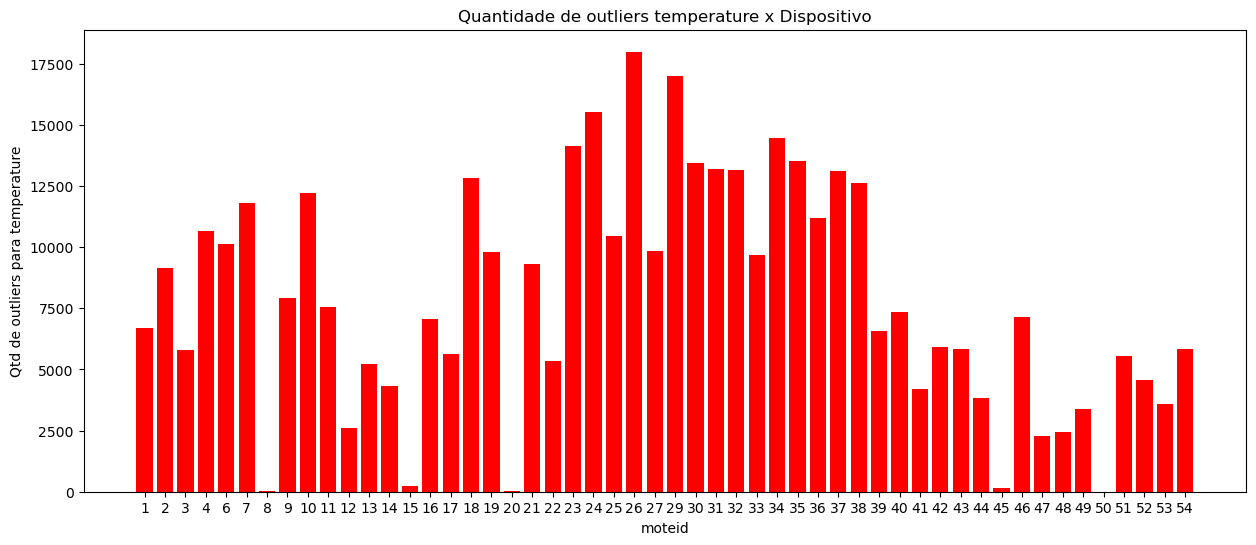

In [254]:
plt.figure(figsize=(15, 6))
plt.bar(mote_ids, qtd_outliers_temperature, color="red")
plt.xticks(mote_ids)
plt.ylabel('Qtd de outliers para temperature')
plt.xlabel('moteid')
plt.title('Quantidade de outliers temperature x Dispositivo')
plt.show()

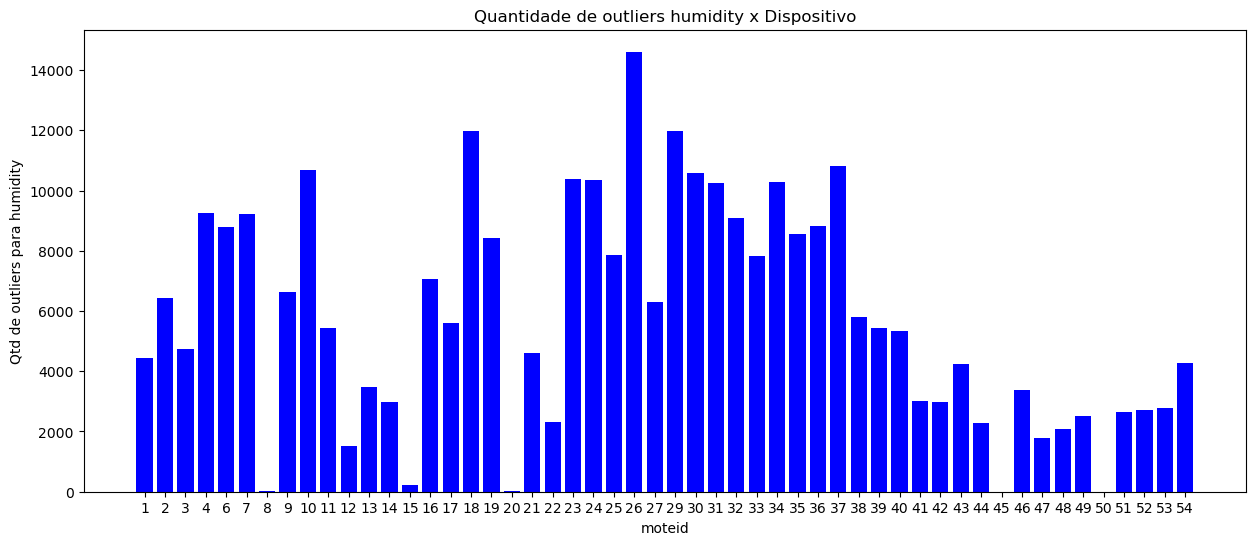

In [255]:
plt.figure(figsize=(15, 6))
plt.bar(mote_ids, qtd_outliers_humidity, color="blue")
plt.xticks(mote_ids)
plt.ylabel('Qtd de outliers para humidity')
plt.xlabel('moteid')
plt.title('Quantidade de outliers humidity x Dispositivo')
plt.show()

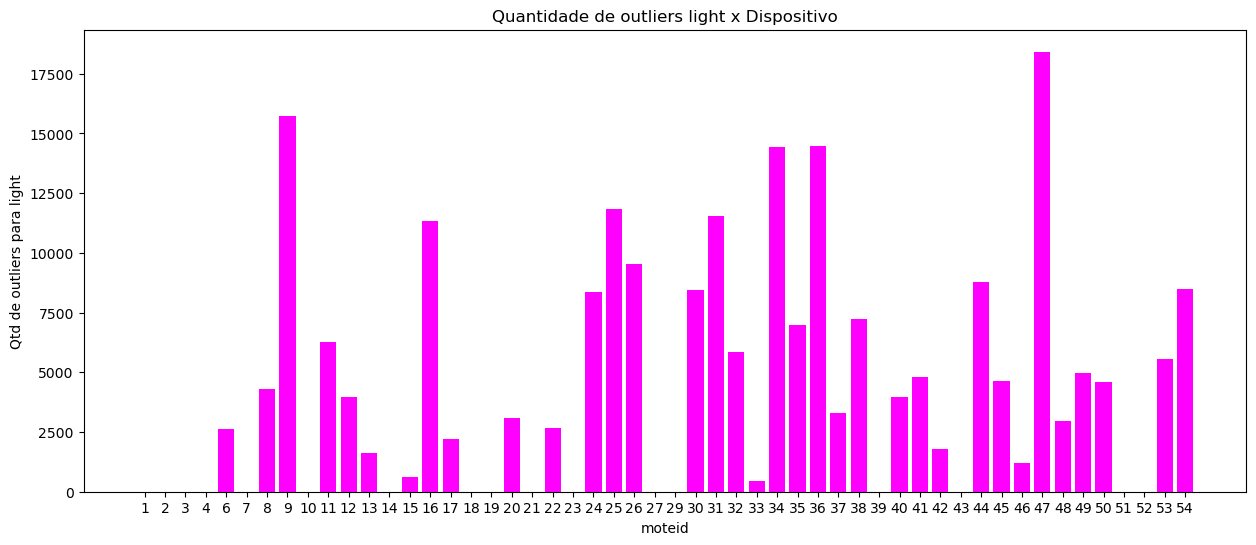

In [256]:
plt.figure(figsize=(15, 6))
plt.bar(mote_ids, qtd_outliers_light, color="magenta")
plt.xticks(mote_ids)
plt.ylabel('Qtd de outliers para light')
plt.xlabel('moteid')
plt.title('Quantidade de outliers light x Dispositivo')
plt.show()

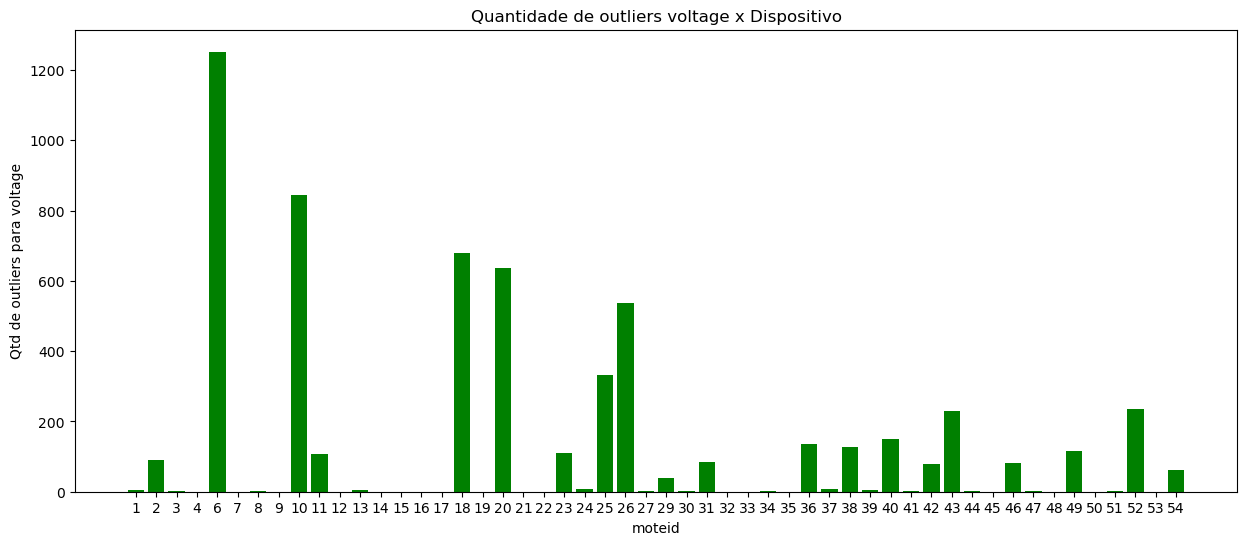

In [257]:
plt.figure(figsize=(15, 6))
plt.bar(mote_ids, qtd_outliers_voltage, color="green")
plt.xticks(mote_ids)
plt.ylabel('Qtd de outliers para voltage')
plt.xlabel('moteid')
plt.title('Quantidade de outliers voltage x Dispositivo')
plt.show()